In [10]:
# %% [markdown]
# # EDA of UCI Appliances Energy Dataset
# 
# This notebook performs exploratory data analysis (EDA) on the Appliances Energy dataset. We'll investigate target distributions, time-based trends, and correlations to understand the data better.

In [11]:
# %% [markdown]
# ## 1. Load data and parse 'date' column

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Configurations for aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [13]:
# Load the data
df = pd.read_csv("D:\\smart-building-energy-mlops\\data\\raw\\energydata_complete.csv", parse_dates=['date'])

In [14]:
# %% [markdown]
# ## 2. Dataset Basic Information

# %%
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (19735, 29)

Column Names:
 ['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

Data Types:
 date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out

In [15]:
# %% [markdown]
# The dataset contains no missing values and consists of the following columns (including date/time, weather, and indoor sensor readings).

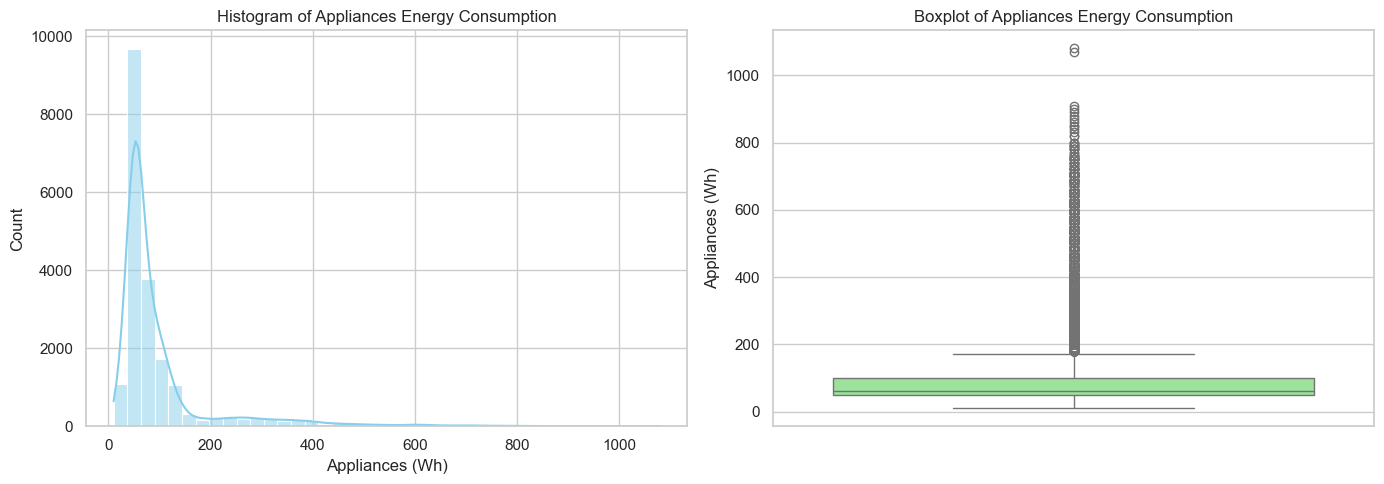

In [16]:
# %% [markdown]
# ## 3. Target Variable Distribution ('Appliances')

# %%
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Appliances'], bins=40, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histogram of Appliances Energy Consumption')
ax[0].set_xlabel('Appliances (Wh)')

sns.boxplot(y=df['Appliances'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot of Appliances Energy Consumption')
ax[1].set_ylabel('Appliances (Wh)')

plt.tight_layout()
plt.show()

In [17]:
# %% [markdown]
# **Observation:**  
# The 'Appliances' target variable is right-skewed with a long tail, meaning most energy consumption values are moderate but some high outliers exist.

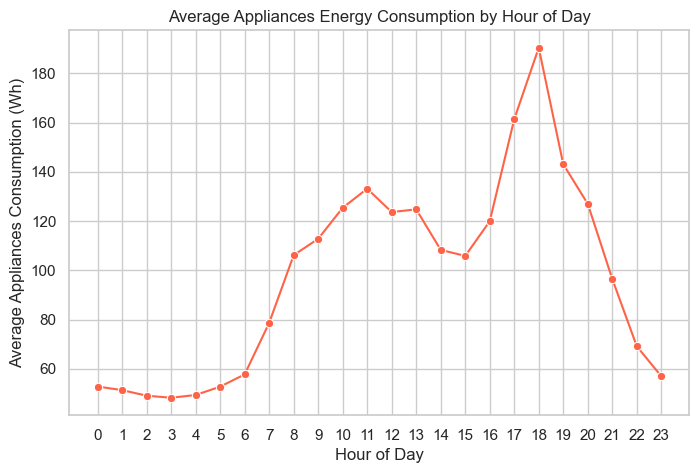

In [18]:
# %% [markdown]
# ## 4. Energy Consumption by Hour of Day

# %%
df['hour'] = df['date'].dt.hour
hourly_mean = df.groupby('hour')['Appliances'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_mean.index, y=hourly_mean.values, marker='o', color='tomato')
plt.title('Average Appliances Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Appliances Consumption (Wh)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

In [19]:
# %% [markdown]
# **Observation:**  
# Energy consumption rises in the morning, peaks in the evening, and drops late at night, reflecting typical household activity patterns.

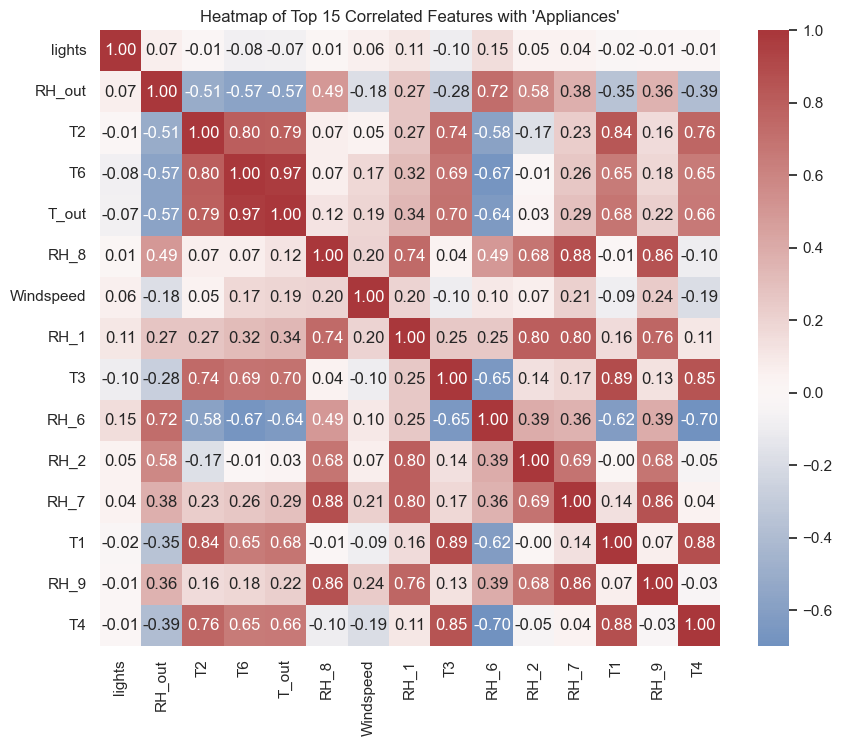

In [20]:
# %% [markdown]
# ## 5. Correlation Heatmap: Top Features vs 'Appliances'

# %%
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('hour')
corrs = df[numeric_cols].corr()['Appliances'].abs().sort_values(ascending=False)
top_corr_features = corrs.index[1:16]  # Exclude 'Appliances' itself

plt.figure(figsize=(10, 8))
corr_matrix = df[top_corr_features].corr().round(2)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Heatmap of Top 15 Correlated Features with 'Appliances'")
plt.show()

In [21]:
# %% [markdown]
# **Observation:**  
# Several temperature, humidity, and weather sensor readings are correlated with appliance energy usage. Correlations help identify important predictors for modeling.

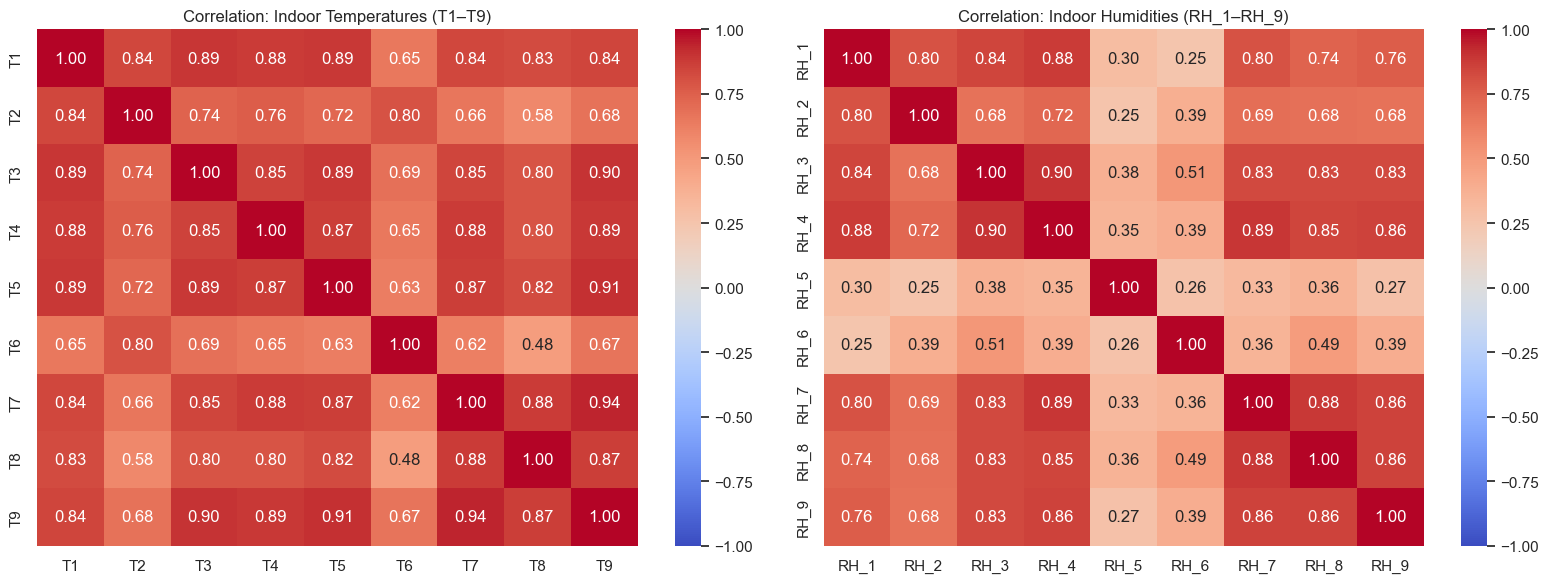

In [22]:
# %% [markdown]
# ## 6. Multicollinearity: Indoor Temperatures and Humidities

# %%
# Indoor temperatures: T1–T9; Humidities: RH_1–RH_9
T_cols = [f'T{i}' for i in range(1, 10)]
RH_cols = [f'RH_{i}' for i in range(1, 10)]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Temperatures
sns.heatmap(df[T_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title("Correlation: Indoor Temperatures (T1–T9)")

# Humidities
sns.heatmap(df[RH_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title("Correlation: Indoor Humidities (RH_1–RH_9)")

plt.tight_layout()
plt.show()

In [23]:
# %% [markdown]
# **Observation:**  
# Both indoor temperature and humidity sensors show strong correlations with one another. This multicollinearity can affect models, so feature selection or dimensionality reduction may be needed.